# Value Function Iteration

#### Import Numpy

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [25]:
%watermark -a "Lukas Hager" -v --python -p numpy,pandas

Author: Lukas Hager

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

numpy : 1.19.2
pandas: 1.1.3



#### Define Parameters

In [3]:
transition_mat = np.array([[.75, .25],
                           [.2, .8]])

state_vec = np.array([.5, 1])

r = .01
beta = .97
gamma = 1.5
epsilon = 10**(-4)

#### Define the Stationary Distribution of Markov Chain

In [4]:
eigens = np.linalg.eig(transition_mat.transpose())

Get the eigenvector corresponding to an eigenalue of 1 and standardize to probabilities

In [5]:
eig_idx = np.where(eigens[0] == 1)
eig_vectors = eigens[1][:,eig_idx]
stat_dist = np.squeeze(eig_vectors/eig_vectors.sum())

#### Define Grid

In [6]:
a_grid = np.linspace(0,50,num=250)
z_grid = np.linspace(.5,1,num=2)
ag, zg = np.meshgrid(a_grid, z_grid)
grid = np.column_stack((ag.flatten(), zg.flatten()))

#### Define Utility Function

In [7]:
def u(c):
    u_val = (c**(1-gamma))/(1-gamma)
    return(u_val)

#### Define Old and New Value Function Arrays and Iterate

In [22]:
V_new = np.ones((len(a_grid), len(z_grid)))
policy = np.zeros((len(a_grid), len(z_grid)))

diff = 100
while diff > epsilon:
    
    # reset V grids
    V_old = V_new.copy()
    
    for val in grid:
        
        # define parameters and calculate c and u(c)
        a_i = val[0]
        z_j = val[1]
        trans = transition_mat[np.where(z_grid == z_j)].squeeze()
        V_idx = (np.where(a_grid == a_i)[0].item(), 
                 np.where(z_grid == z_j)[0].item())
        
        c = (1+r)*a_i + z_j - a_grid
        
        # restrict to positive consumption and calculate V_new value
        pos_c = np.where(c >= 0)
        V = u(c)[pos_c] + beta * np.matmul(V_old, trans)[pos_c]
        max_V = V.max()
        
        # get the policy function
        chosen_a = a_grid[pos_c[0]][np.where(V == max_V)]
        
        # update element in array
        V_new[V_idx] = max_V
        policy[V_idx] = chosen_a
        
    # compare to the previous iteration and get the max value
    diff = abs(V_new - V_old).max()
    
    # print max diff for reference
    print('Maximum difference: {}'.format(diff))


<ipython-input-7-2a839d6e222f>:2: RuntimeWarning: invalid value encountered in power
  u_val = (c**(1-gamma))/(1-gamma)
<ipython-input-7-2a839d6e222f>:2: RuntimeWarning: divide by zero encountered in power
  u_val = (c**(1-gamma))/(1-gamma)


Maximum difference: 2.85842712474619
Maximum difference: 2.5717807332528535
Maximum difference: 2.3874505875251355
Maximum difference: 2.2530385474951924
Maximum difference: 2.1492369475885074
Maximum difference: 2.065393921179494
Maximum difference: 1.988819765255112
Maximum difference: 1.9213572482961503
Maximum difference: 1.8585958461298233
Maximum difference: 1.7987067052476178
Maximum difference: 1.7423468871463967
Maximum difference: 1.6881719820559908
Maximum difference: 1.6358809135953791
Maximum difference: 1.585773139005319
Maximum difference: 1.537481798162915
Maximum difference: 1.4904906918881267
Maximum difference: 1.4452294721140007
Maximum difference: 1.401309858005721
Maximum difference: 1.3588309061162462
Maximum difference: 1.3177407044137723
Maximum difference: 1.2779951698191994
Maximum difference: 1.2393807438668318
Maximum difference: 1.2019856586695
Maximum difference: 1.1657602935678355
Maximum difference: 1.1306690022536756
Maximum difference: 1.0966533268538

Maximum difference: 0.00357186134230858
Maximum difference: 0.0034647055020329276
Maximum difference: 0.003360764336974853
Maximum difference: 0.0032599414068670285
Maximum difference: 0.0031621431646726705
Maximum difference: 0.003067278869735901
Maximum difference: 0.002975260503632171
Maximum difference: 0.002886002688526901
Maximum difference: 0.0027994226078718043
Maximum difference: 0.002715439929637853
Maximum difference: 0.0026339767317438145
Maximum difference: 0.002554957429794058
Maximum difference: 0.0024783087069124576
Maximum difference: 0.0024039594457008207
Maximum difference: 0.002331840662336049
Maximum difference: 0.0022618854424649726
Maximum difference: 0.0021940288791881812
Maximum difference: 0.0021282080128202097
Maximum difference: 0.002064361772440293
Maximum difference: 0.0020024309192621104
Maximum difference: 0.0019423579916804101
Maximum difference: 0.0018840872519376717
Maximum difference: 0.0018275646343823837
Maximum difference: 0.0017727376953473595
Ma

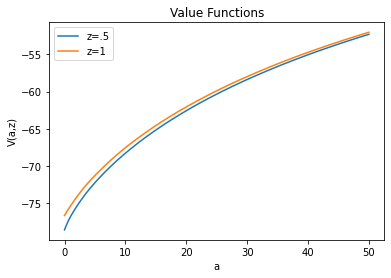

In [23]:
fig = plt.figure()
ax = plt.axes()

ax.plot(a_grid, V_new[:,0], label = 'z=.5');
ax.plot(a_grid, V_new[:,1], label = 'z=1');
plt.legend();
ax.set(title = 'Value Functions',
       xlabel = 'a',
       ylabel = 'V(a,z)');

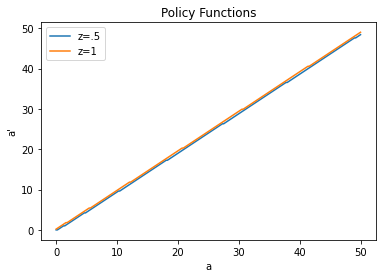

In [24]:
fig = plt.figure()
ax = plt.axes()

ax.plot(a_grid, policy[:,0], label = 'z=.5');
ax.plot(a_grid, policy[:,1], label = 'z=1');
plt.legend();
ax.set(title = 'Policy Functions',
       xlabel = 'a',
       ylabel = 'a\'');

In [21]:
np.column_stack((a_grid.flatten(), policy[:,0].flatten()))

array([[ 0.        ,  0.        ],
       [ 0.20080321,  0.        ],
       [ 0.40160643,  0.20080321],
       [ 0.60240964,  0.40160643],
       [ 0.80321285,  0.60240964],
       [ 1.00401606,  0.80321285],
       [ 1.20481928,  1.00401606],
       [ 1.40562249,  1.00401606],
       [ 1.6064257 ,  1.20481928],
       [ 1.80722892,  1.40562249],
       [ 2.00803213,  1.6064257 ],
       [ 2.20883534,  1.80722892],
       [ 2.40963855,  2.00803213],
       [ 2.61044177,  2.20883534],
       [ 2.81124498,  2.40963855],
       [ 3.01204819,  2.61044177],
       [ 3.21285141,  2.81124498],
       [ 3.41365462,  3.01204819],
       [ 3.61445783,  3.21285141],
       [ 3.81526104,  3.41365462],
       [ 4.01606426,  3.61445783],
       [ 4.21686747,  3.81526104],
       [ 4.41767068,  4.01606426],
       [ 4.6184739 ,  4.21686747],
       [ 4.81927711,  4.21686747],
       [ 5.02008032,  4.41767068],
       [ 5.22088353,  4.6184739 ],
       [ 5.42168675,  4.81927711],
       [ 5.62248996,

#### 

In [30]:
value_df = pd.DataFrame(V_new, index=a_grid, columns = z_grid)
policy_df = pd.DataFrame(policy, index=a_grid, columns = z_grid)



,0.5,1.0
0.000000,0.000000,0.200803
0.200803,0.000000,0.401606
0.401606,0.200803,0.602410
0.602410,0.401606,0.803213
0.803213,0.602410,1.004016
...,...,...
49.196787,47.590361,48.192771
49.397590,47.791165,48.393574
49.598394,47.991968,48.594378
49.799197,48.192771,48.795181
